<h1><center>CPS 396D Final Exam</center></h1>
<h2><center>April 29, 2019 <br>
200 Points</center></h2>
<b>Answer the following questions and submit your Jupyter notebook via BlackBoard. Show your work by providing comments in your code shells to get partial credit.</b>

You have been recruited as a leading expert in developing scientific simulations for KinniCorps, Inc. Their client is designing an automated factory and one of their autonomous vehicles will be used to transport a widget from one location in the factory to another. This transporter was designed to only move in a straight line between 2 points, and has no ability to steer itself. Assuming a perfectly flat, smooth surface, the transporter will go ina perfectly straight path. However, due to engineering flaws the factory floor has random imperfections and rough spots, causing the transporter to deviate from its straight path.

Your job is to write a time-based simulation to determine how close the transporter gets to its target destination. Use the following parameters and then answer the following questions.

Simulation Parameters:

1. Simulation time: 15 seconds
2. Simulation time interval: 1 second
3. Starting position: (0, 0) in feet
4. Target position: (15, 0) in feet
5. Velocity: Normally distributed. Mean of 1 ft/sec with a standard deviation of 0.05 ft/sec
6. Deviation from straight path per second (radians from x axis): $\pm$0.05 radians uniformaly distributed

<b>Note:</b> Remember or look up trigonometric functions like cosine and sine and the pythagorean theorem to help you in this problem.
    
Do the following:

1. Implement the velocity calculation (30 Points)
2. Implement the deviation angle (30 Points)
3. Determine the new position given the angle and the velocity (30 Points)
4. Calculate the distance from the simulated final position after 15 seconds and the target position, and print it out (30 Points)
5. Implement the correct simulation controls and state variables to do the simulation (40 Points)
6. Plot the path of the transporter (40 Points)

In [38]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [39]:
def calc_velocity():
    return np.random.normal(1.,0.05)

In [40]:
def calc_deviation_angle():
    return random.uniform(-0.05, 0.05)

In [49]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2) 

The distance between the final location and the intended location is: 0.002602


Text(0,0.5,'Deviation')

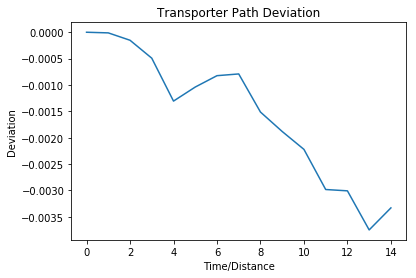

In [73]:
# sim control variables
sim_time = 1
sim_max = 15

# sim state variables

# Keep track of current location of transporter
x = 0
y = 0

targ_x = 15
targ_y = 0

# Keep track of historic location of transporter, for graphing
xs = []
ys = []

while sim_time <= sim_max:
    # Get a velocity and an angle for this moment in the simulation
    vel = calc_velocity()
    angle = math.radians(calc_deviation_angle())
    
    # Using 'TOA': tan = opposite / adjacent
    # Solve for y_move: tan(angle) = y_move / velocity
    y_move = np.tan(angle) * vel
    
    # append current locations, for graphing
    xs.append(x)
    ys.append(y)
    
    x += 1
    y += y_move
    
    sim_time += 1

print('The distance between the final location and the intended location is: {:.6f}'.format(distance(x,y,targ_x,targ_y)))
    
fig, ax = plt.subplots()
plt.plot(xs, ys)
plt.title("Transporter Path Deviation")
plt.xlabel("Time/Distance")
plt.ylabel("Deviation")